# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the training data

In [2]:
file_path = r"C:\Users\User\OneDrive\Desktop\Flight-Price-Prediction\Data\train.csv"
train = pd.read_csv(file_path)

In [3]:
train

airline date_of_journey    source destination  dep_time  \
0     Jet Airways      2019-03-21  Banglore   New Delhi  08:55:00   
1     Jet Airways      2019-03-27     Delhi      Cochin  17:30:00   
2           Goair      2019-03-09  Banglore   New Delhi  11:40:00   
3       Air India      2019-06-12   Kolkata    Banglore  09:25:00   
4     Jet Airways      2019-03-12  Banglore   New Delhi  22:55:00   
...           ...             ...       ...         ...       ...   
6690  Jet Airways      2019-03-21     Delhi      Cochin  10:45:00   
6691    Air India      2019-05-01   Kolkata    Banglore  09:25:00   
6692  Jet Airways      2019-06-01     Delhi      Cochin  14:00:00   
6693     Air Asia      2019-06-24     Delhi      Cochin  07:55:00   
6694    Air India      2019-03-01  Banglore   New Delhi  11:50:00   

     arrival_time  duration  total_stops              additional_info  price  
0        19:10:00       615          1.0  In-flight meal not included   7832  
1        04:25:00       655          1.0  In-flight meal not included   6540  
2        14:35:00       175          0.0                      No Info   7305  
3        18:30:00       545          1.0                      No Info   8366  
4        07:40:00       525          1.0  In-flight meal not included  11087  
...           ...       ...          ...                          ...    ...  
6690     18:50:00      1925          2.0                      No Info  11093  
6691     18:30:00       545          1.0                      No Info   8891  
6692     19:00:00       300          1.0  In-flight meal not included  10262  
6693     13:25:00       330          1.0                      No Info   6152  
6694     08:55:00      1265          1.0               1 Long layover  14594  

[6695 rows x 10 columns]

### 2.1 Fixing data types

In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col : pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 3. High - level summary of data

In [7]:
train.describe(include="number")

duration  total_stops         price
count  6695.000000  6694.000000   6695.000000
mean    633.489171     0.801464   9030.965646
std     503.006311     0.659737   4639.522857
min      75.000000     0.000000   1759.000000
25%     170.000000     0.000000   5224.000000
50%     510.000000     1.000000   8283.000000
75%     922.500000     1.000000  12373.000000
max    2860.000000     3.000000  62427.000000

In [8]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

airline source destination  total_stops additional_info
count          6695   6695        6695       6694.0            6695
unique            9      5           6          4.0               7
top     Jet Airways  Delhi      Cochin          1.0         No Info
freq           2391   2730        2730       3580.0            5249

# 4. High - level analysis of outliers

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [11]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")))
)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# 5. Pair plots

C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


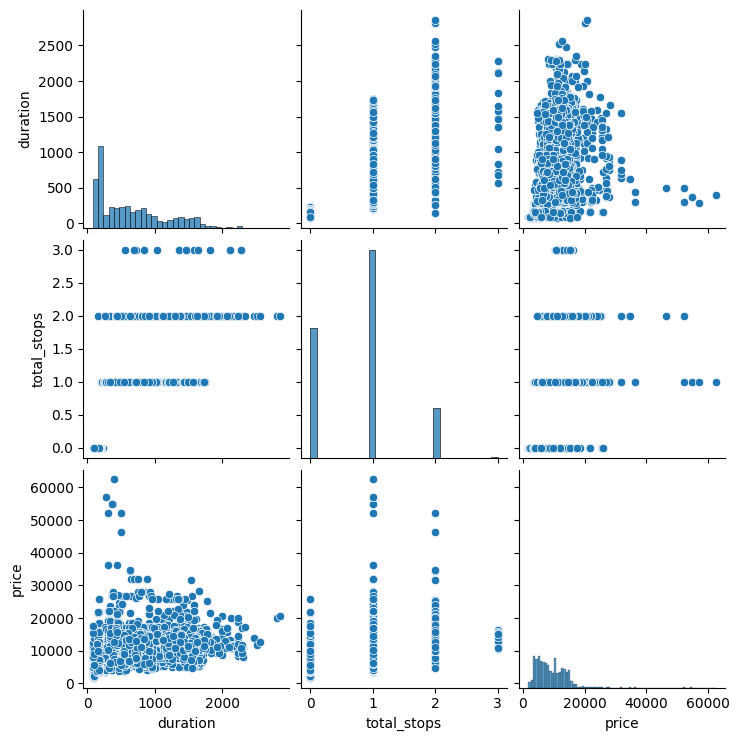

In [12]:
sns.pairplot(train)
plt.show();

# 6. Correlation analysis

In [13]:
numeric_features = train.select_dtypes(include="number")

# Calculate Spearman rank correlation matrix
spearman_corr = numeric_features.corr(method='spearman')

print("Spearman Rank Correlation Matrix:")
print(spearman_corr)

Spearman Rank Correlation Matrix:
             duration  total_stops     price
duration     1.000000     0.822906  0.697860
total_stops  0.822906     1.000000  0.721034
price        0.697860     0.721034  1.000000


# 7. Detailed analysis

In [14]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 7.1 Airlines

In [15]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

In [16]:
print(f"Data type : {train.airline.dtype}")

Data type : object


In [17]:
print(f"Cardinality : {train.airline.nunique()} categories")

Cardinality : 9 categories


In [18]:
print(f"Missing data : {train.airline.isna().sum()}")

Missing data : 0


In [19]:
(
    train
    .airline
    .describe()
    .rename("")
    .to_frame()
)

count          6695
unique            9
top     Jet Airways
freq           2391

In [20]:
train.airline.value_counts()

airline
Jet Airways          2391
Indigo               1296
Air India            1076
Multiple Carriers     736
Spicejet              537
Vistara               322
Air Asia              211
Goair                 125
Trujet                  1
Name: count, dtype: int64

In [21]:
train.airline.value_counts(normalize=True)

airline
Jet Airways          0.357132
Indigo               0.193577
Air India            0.160717
Multiple Carriers    0.109933
Spicejet             0.080209
Vistara              0.048096
Air Asia             0.031516
Goair                0.018671
Trujet               0.000149
Name: proportion, dtype: float64

In [22]:
(
    train
    .airline
    .value_counts()
    .pipe(lambda ser : pd.concat(
        [
            ser,
            train.airline.value_counts(normalize=True)
        ],
        axis=1
    )).set_axis(["Count", "Percentage"], axis=1)
)

Count  Percentage
airline                             
Jet Airways         2391    0.357132
Indigo              1296    0.193577
Air India           1076    0.160717
Multiple Carriers    736    0.109933
Spicejet             537    0.080209
Vistara              322    0.048096
Air Asia             211    0.031516
Goair                125    0.018671
Trujet                 1    0.000149

<Axes: xlabel='airline'>

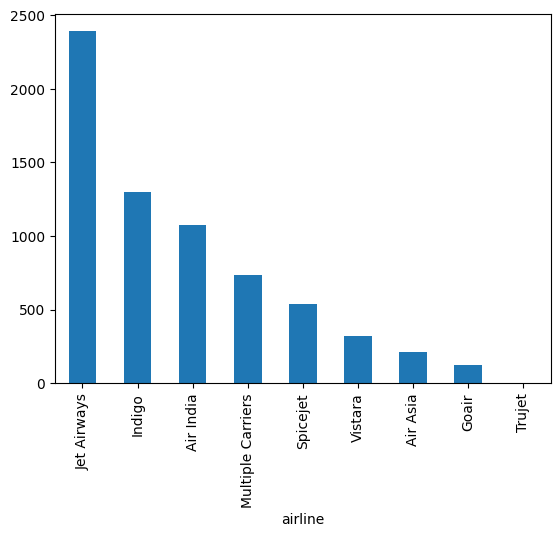

In [23]:
train.airline.value_counts().plot(kind="bar")

<Axes: ylabel='count'>

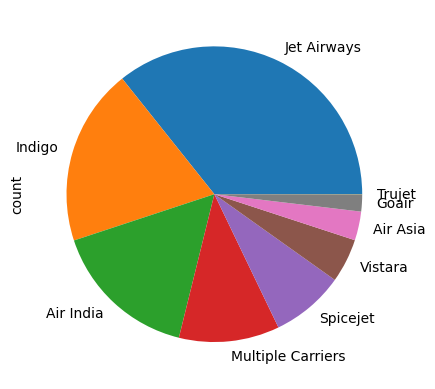

In [24]:
train.airline.value_counts().plot(kind="pie")

### Bivariate analysis of Airline Vs. Prices

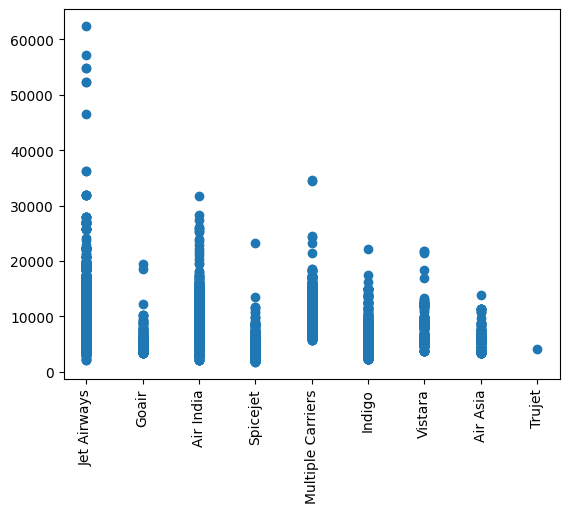

In [25]:
plt.scatter(train.airline, train.price)
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

<Axes: xlabel='airline'>

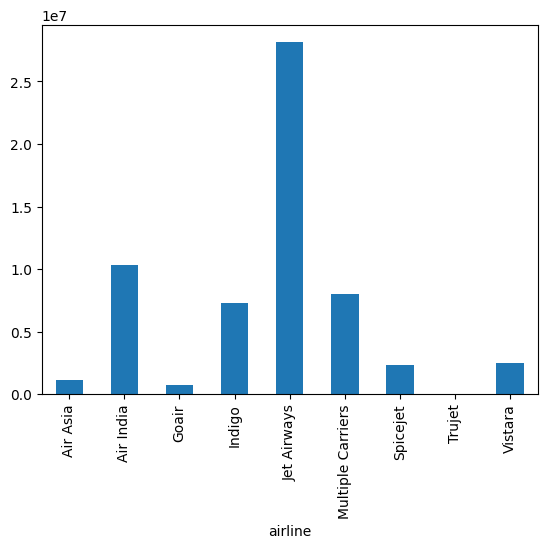

In [26]:
train.groupby('airline')['price'].sum().plot(kind="bar")

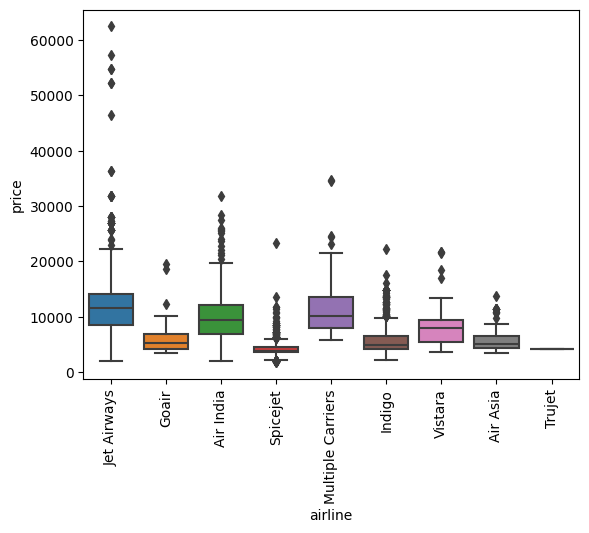

In [64]:
sns.boxplot(x=train.airline, y=train.price)
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

In [28]:
def plot_with_rotated_labels(data, **kwargs):
    sns.barplot(x="airline", y="price", data=train, order=train.airline.unique(), **kwargs)
    plt.xticks(rotation=45)

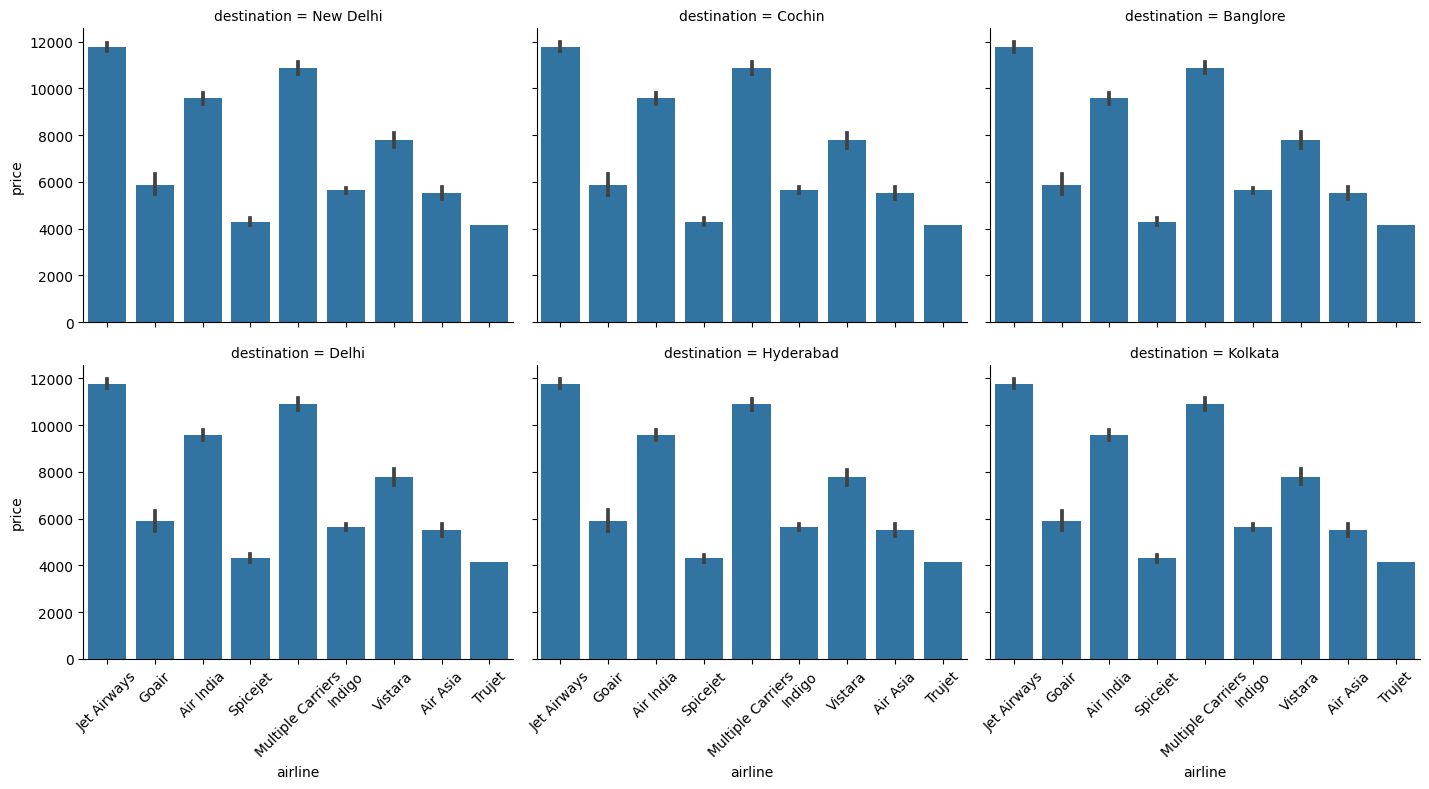

In [29]:
airline_grid = sns.FacetGrid(
    data=train,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map_dataframe(plot_with_rotated_labels)

plt.tight_layout()
plt.show()

### 7.2 date_of_journey

C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


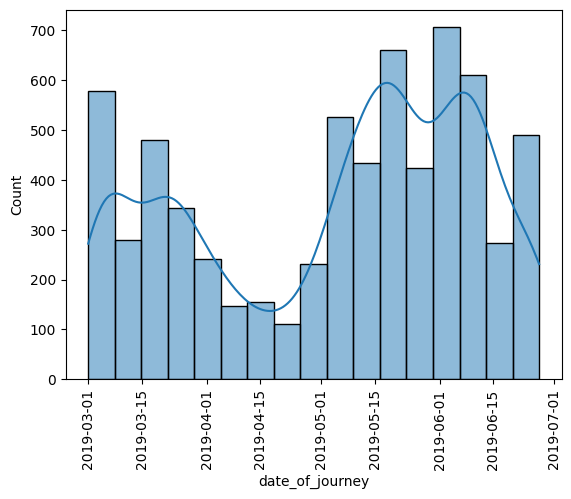

In [50]:
sns.histplot(x=train.date_of_journey, kde=True)
plt.xticks(rotation=90)
plt.show();

C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


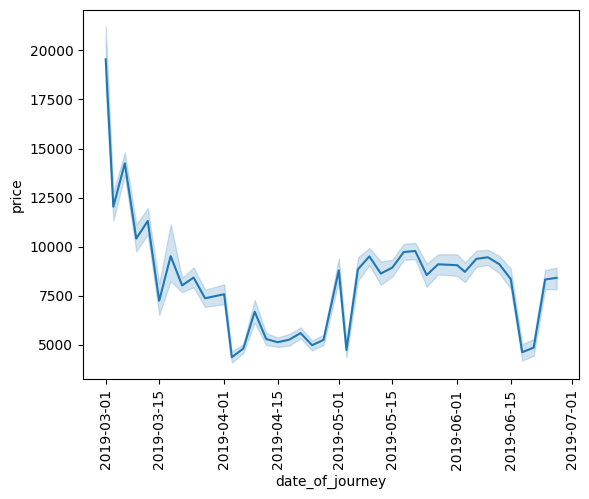

In [31]:
sns.lineplot(x=train.date_of_journey, y=train.price)
plt.xticks(rotation=90)
plt.show();

<Axes: xlabel='Month'>

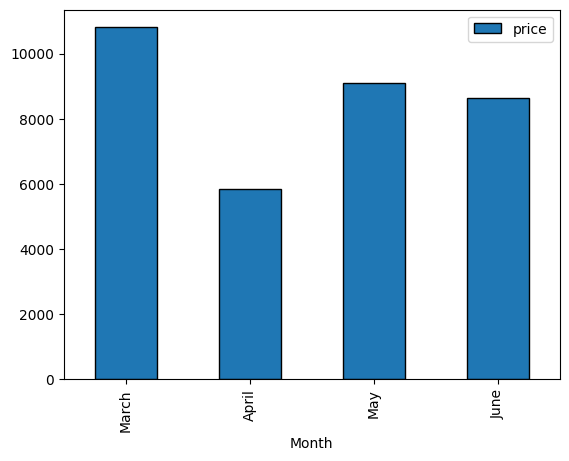

In [32]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        edgecolor='black'
    )
)

<Axes: xlabel='Week'>

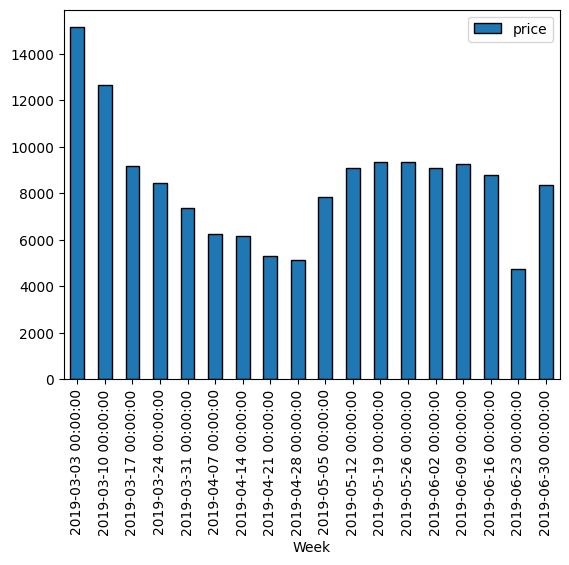

In [33]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='W'))
    .price.mean()
    .to_frame()
    # .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index='Week')
    .plot(
        kind='bar',
        edgecolor='black'
    )
)

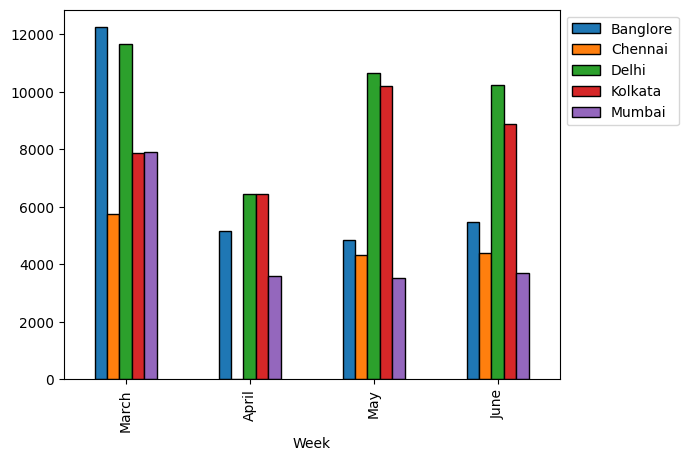

In [34]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq = 'M'), 'source'])
    .price.mean()
    .unstack()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index='Week')
    .plot(
        kind='bar',
        edgecolor='black'
    )
)

plt.legend(loc='upper left', bbox_to_anchor=(1,1))


### 7.3 dep_time

In [35]:
train.dep_time

0      2024-06-13 08:55:00
1      2024-06-13 17:30:00
2      2024-06-13 11:40:00
3      2024-06-13 09:25:00
4      2024-06-13 22:55:00
               ...        
6690   2024-06-13 10:45:00
6691   2024-06-13 09:25:00
6692   2024-06-13 14:00:00
6693   2024-06-13 07:55:00
6694   2024-06-13 11:50:00
Name: dep_time, Length: 6695, dtype: datetime64[ns]

C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


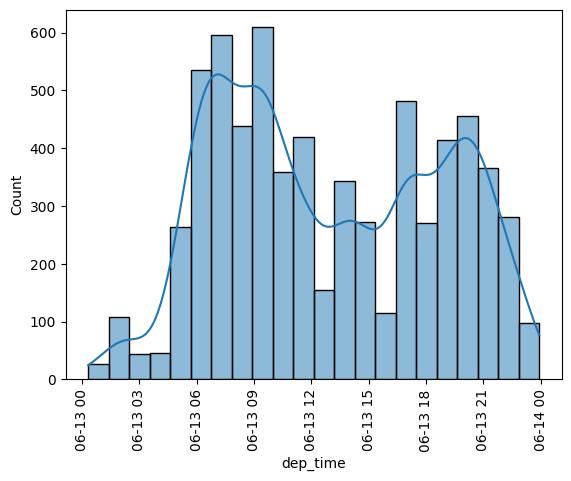

In [36]:
sns.histplot(x=train.dep_time, kde=True)
plt.xticks(rotation=90)
plt.show();

C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


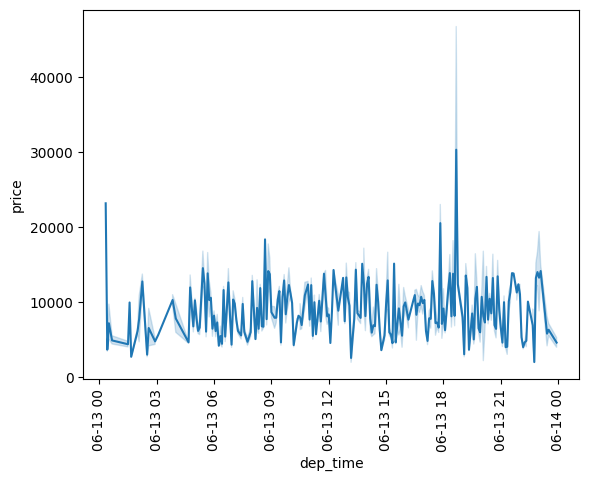

In [37]:
sns.lineplot(x=train.dep_time, y=train.price)
plt.xticks(rotation=90)
plt.show();

In [45]:
(
    train
    .assign(dep_time=lambda df_: (
    np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
            df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
            df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
            ["morning", "afternoon", "evening"],
            default="night")
))
)

airline date_of_journey    source destination   dep_time  \
0     Jet Airways      2019-03-21  Banglore   New Delhi    morning   
1     Jet Airways      2019-03-27     Delhi      Cochin    evening   
2           Goair      2019-03-09  Banglore   New Delhi    morning   
3       Air India      2019-06-12   Kolkata    Banglore    morning   
4     Jet Airways      2019-03-12  Banglore   New Delhi      night   
...           ...             ...       ...         ...        ...   
6690  Jet Airways      2019-03-21     Delhi      Cochin    morning   
6691    Air India      2019-05-01   Kolkata    Banglore    morning   
6692  Jet Airways      2019-06-01     Delhi      Cochin  afternoon   
6693     Air Asia      2019-06-24     Delhi      Cochin    morning   
6694    Air India      2019-03-01  Banglore   New Delhi    morning   

            arrival_time  duration  total_stops              additional_info  \
0    2024-06-13 19:10:00       615          1.0  In-flight meal not included   
1    2024-06-13 04:25:00       655          1.0  In-flight meal not included   
2    2024-06-13 14:35:00       175          0.0                      No Info   
3    2024-06-13 18:30:00       545          1.0                      No Info   
4    2024-06-13 07:40:00       525          1.0  In-flight meal not included   
...                  ...       ...          ...                          ...   
6690 2024-06-13 18:50:00      1925          2.0                      No Info   
6691 2024-06-13 18:30:00       545          1.0                      No Info   
6692 2024-06-13 19:00:00       300          1.0  In-flight meal not included   
6693 2024-06-13 13:25:00       330          1.0                      No Info   
6694 2024-06-13 08:55:00      1265          1.0               1 Long layover   

      price  
0      7832  
1      6540  
2      7305  
3      8366  
4     11087  
...     ...  
6690  11093  
6691   8891  
6692  10262  
6693   6152  
6694  14594  

[6695 rows x 10 columns]

### 7.4 duration

In [46]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [48]:
train.duration.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6695 entries, 0 to 6694
Series name: duration
Non-Null Count  Dtype
--------------  -----
6695 non-null   int64
dtypes: int64(1)
memory usage: 52.4 KB


In [49]:
train.duration.describe()

count    6695.000000
mean      633.489171
std       503.006311
min        75.000000
25%       170.000000
50%       510.000000
75%       922.500000
max      2860.000000
Name: duration, dtype: float64

In [54]:
(
    train
    .duration
    .quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])
    .rename(index = lambda val : f"{val * 100:.0f}")
    .rename("Values")
    .rename_axis(index="Percentile")
    .to_frame()
)

Values
Percentile        
0             75.0
5             90.0
10           145.0
25           170.0
50           510.0
75           922.5
90          1440.0
95          1601.5
99          1855.0
100         2860.0

In [58]:
from scipy import stats

print(f"Mean : {train.duration.mean()}")
print(f"Trimmed Mean (5%): {stats.trim_mean(train.duration, 0.05)}")
print(f"Mean : {stats.trim_mean(train.duration, 0.1)}")
print(f"Median : {train.duration.median()}")

Mean : 633.4891710231516
Trimmed Mean (5%): 599.7112991538079
Mean : 571.0537614336382
Median : 510.0


In [61]:
print(f"Variance : {train.duration.var()}")
print(f"Standard deviation : {train.duration.std()}")
iqr = train.duration.quantile(0.75) - train.duration.quantile(0.25) 
print(f"IQR : {iqr}")
print(f"MAD : {stats.median_abs_deviation(train.duration.dropna())}")

Variance : 253015.34851582
Standard deviation : 503.00631061232224
IQR : 752.5
MAD : 340.0


In [63]:
print(f"Skewness : {train.duration.skew()}")
print(f"Kurtosis : {train.duration.kurtosis()}")

Skewness : 0.8935781434332327
Kurtosis : -0.053859643909501376


C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


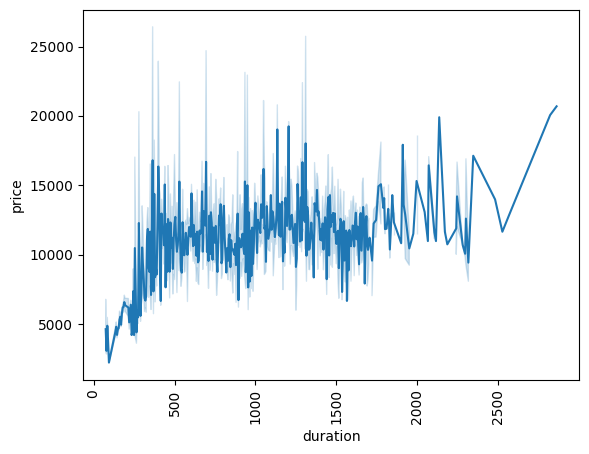

In [52]:
sns.lineplot(x=train.duration, y=train.price)
plt.xticks(rotation=90)
plt.show();

C:\Users\User\anaconda3\envs\ml_course\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


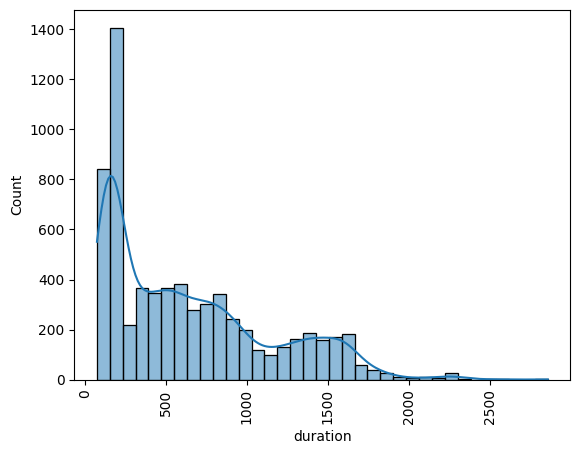

In [51]:
sns.histplot(x=train.duration, kde=True)
plt.xticks(rotation=90)
plt.show();

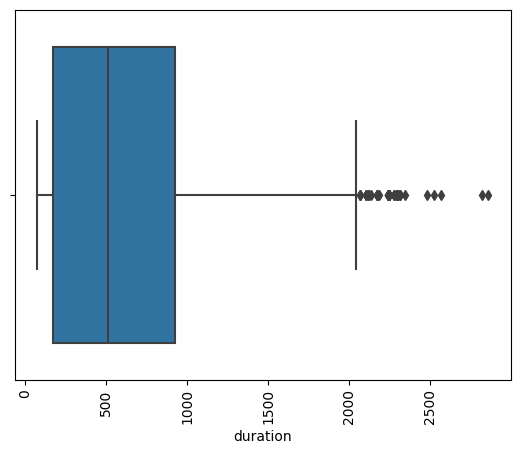

In [66]:
sns.boxplot(x=train.duration)
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

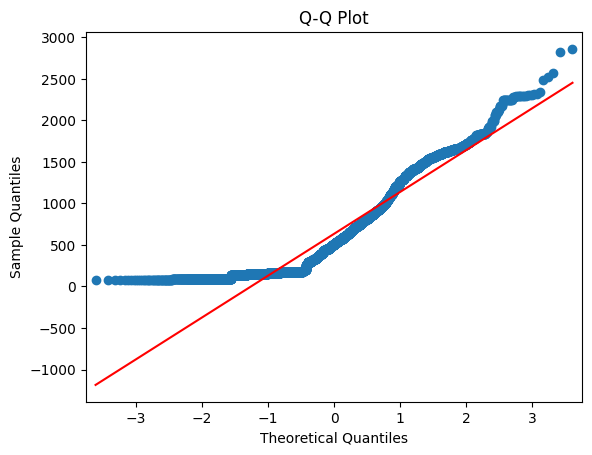

In [68]:
import statsmodels.api as sm
fig = sm.qqplot(train.duration, line='s')
plt.title('Q-Q Plot')
plt.show()

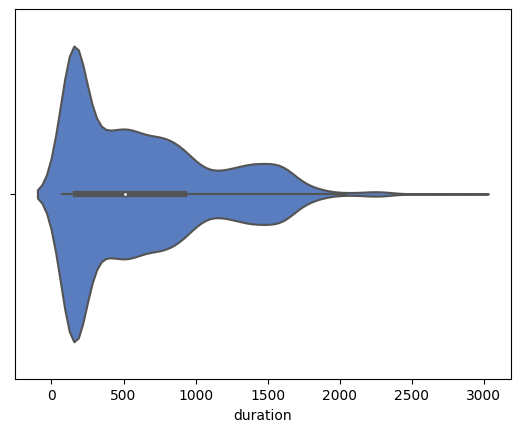

In [69]:
sns.violinplot(x=train.duration, palette='muted')
plt.show()

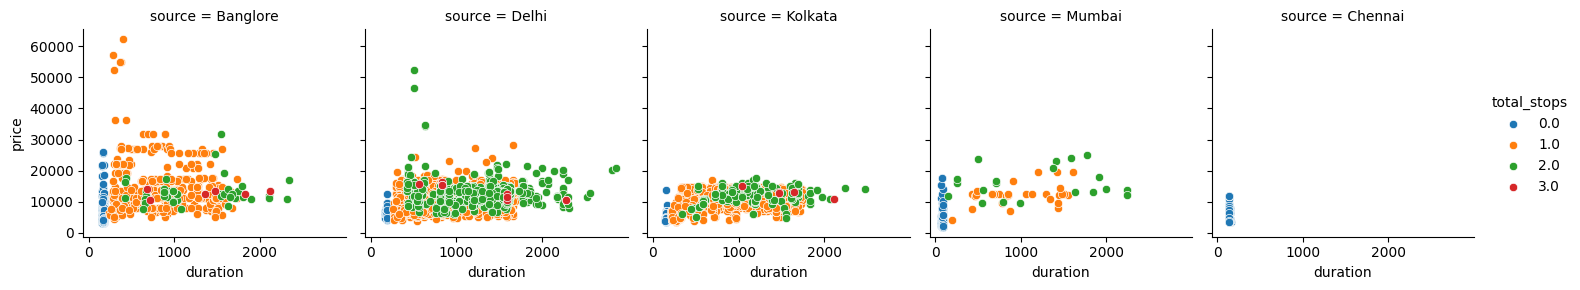

In [73]:
duration_grid = sns.FacetGrid(
    data=train,
    hue='total_stops',
    col='source',
    sharey=True
)

duration_grid.map(sns.scatterplot, 'duration', 'price')
duration_grid.add_legend()

# 8. Automated EDA

In [74]:
from ydata_profiling import ProfileReport

In [77]:
report = ProfileReport(train)

In [78]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
report.to_file(output_file='Custom Pandas Profiling Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]